# EDA AMAZON SALES ANALYSIS

In [1]:
### import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
## import Dataset

Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/AMAZON SALES PROJECT/Data/cleaned_amazon_sales.csv')
Data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
Data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

## monthly sales trends?

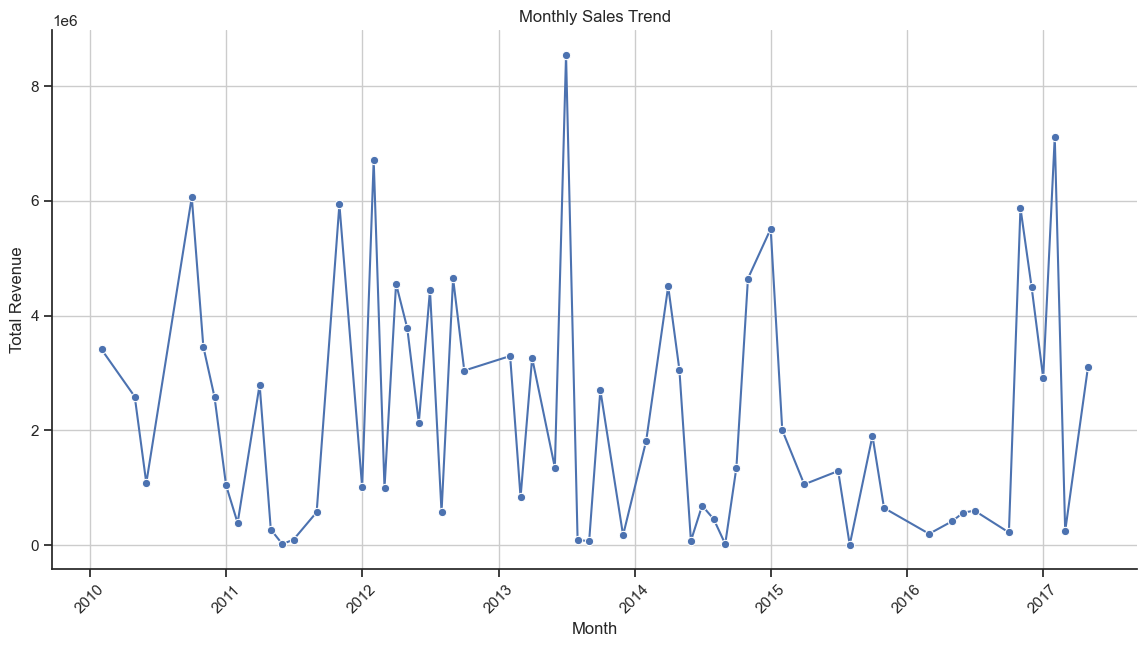

In [4]:
df = Data.copy()

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'Order Date'
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum().reset_index()

# Convert 'Year-Month' back to datetime for plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()

# Set the plot style and plot the data
sns.set(style="whitegrid")
sns.set_theme(style='ticks')
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Total Revenue', marker='o', color='b')

# Customizing the plot
sns.despine()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## yearly sales trends?

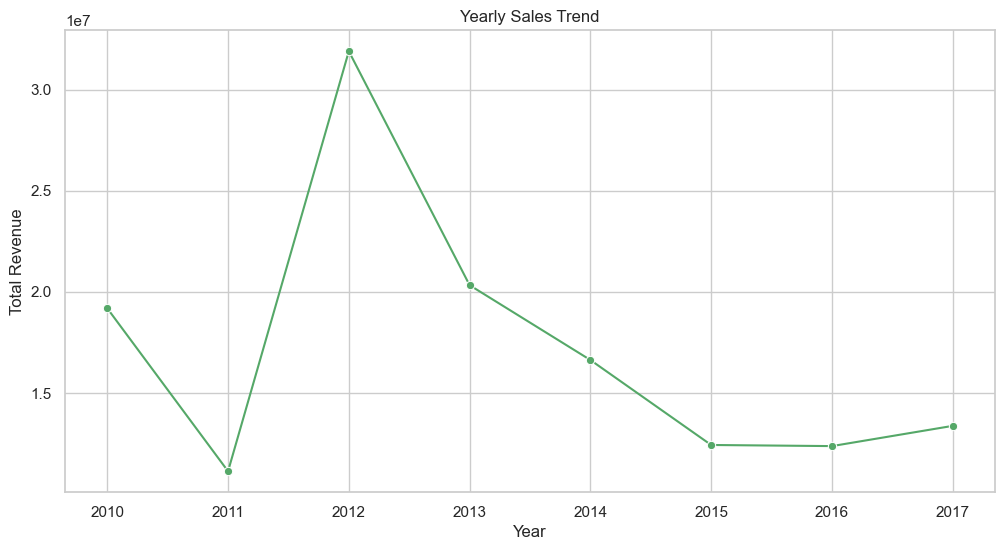

In [5]:
# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Calculate yearly sales
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()

# Plot the yearly sales trend
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Revenue', marker='o', color='g')

# Customizing the plot
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

## month-wise sales pattern across years?

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/3704358251.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='Month', y='Total Revenue', marker='o', palette= "viridis")
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/3704358251.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='Month', y='Total Revenue', marker='o', palette= "viridis")
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/3704358251.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='Month', y='Total Revenue', marker='o', palette= "viridis")
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/3704358251.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='Month', y='Total Revenue', marker='o', palette= "viridis")
/var/fol

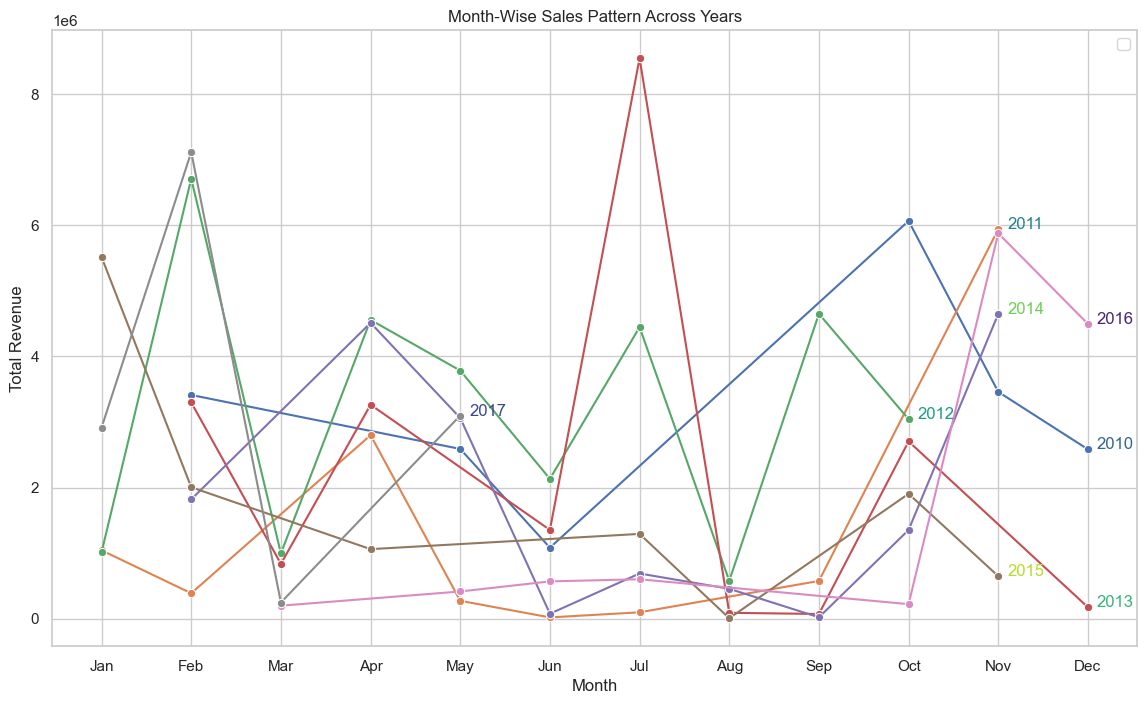

In [6]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Calculate total sales for each month across years
monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Set the Seaborn style and plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot each year separately to enable custom labels
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    sns.lineplot(data=data, x='Month', y='Total Revenue', marker='o', palette= "viridis")

# Add labels at the end of each line
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.text(
        x=data['Month'].iloc[-1] + 0.1,   # Position the label slightly to the right of the last point
        y=data['Total Revenue'].iloc[-1], # Position the label at the y-coordinate of the last point
        s=str(year),                      # Year label as string
        color=sns.color_palette("viridis", len(monthly_sales['Year'].unique()))[year % len(monthly_sales['Year'].unique())]
    )

# Customizing the plot
plt.title("Month-Wise Sales Pattern Across Years")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

## key sales metrics


In [7]:
# 1. Average Order Value (AOV)
total_sales = df['Total Revenue'].sum()
total_orders = df['Order ID'].nunique()  # Unique orders by Order ID
average_order_value = total_sales / total_orders

# 2. Total Sales
total_sales = df['Total Revenue'].sum()

# 3. Total Units Sold
total_units_sold = df['Units Sold'].sum()

# 4. Highest-Selling Product Categories
highest_selling_categories = df.groupby('Item Type')['Total Revenue'].sum().reset_index()
highest_selling_categories = highest_selling_categories.sort_values(by='Total Revenue', ascending=False)

# 5. Most Frequent Buyers
# Assuming 'Country' column represents the buyer; adjust if there's a specific 'Buyer' column
most_frequent_buyers = df['Country'].value_counts().reset_index()
most_frequent_buyers.columns = ['Buyer', 'Order Count']

# Display the metrics
print("Average Order Value (AOV):", average_order_value,'\n')
print("Total Sales:", total_sales, '\n')
print("Total Units Sold:", total_units_sold, '\n')
print("Highest-Selling Product Categories:\n", highest_selling_categories, '\n')
print("Most Frequent Buyers:\n", most_frequent_buyers.head())

Average Order Value (AOV): 1373487.6831 

Total Sales: 137348768.31 

Total Units Sold: 512871 

Highest-Selling Product Categories:
           Item Type  Total Revenue
4         Cosmetics    36601509.60
8   Office Supplies    30585380.07
6         Household    29889712.29
0         Baby Food    10350327.60
3           Clothes     7787292.80
2            Cereal     5322898.90
7              Meat     4503675.75
9     Personal Care     3980904.84
11       Vegetables     3089057.06
1         Beverages     2690794.60
10           Snacks     2080733.46
5            Fruits      466481.34 

Most Frequent Buyers:
                    Buyer  Order Count
0             The Gambia            4
1           Sierra Leone            3
2  Sao Tome and Principe            3
3                 Mexico            3
4              Australia            3


## factors most influence sales trends

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/2312887740.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Item Type', y='Total Revenue', palette="viridis")


Sales by Product Category:
           Item Type  Total Revenue
4         Cosmetics    36601509.60
8   Office Supplies    30585380.07
6         Household    29889712.29
0         Baby Food    10350327.60
3           Clothes     7787292.80
2            Cereal     5322898.90
7              Meat     4503675.75
9     Personal Care     3980904.84
11       Vegetables     3089057.06
1         Beverages     2690794.60
10           Snacks     2080733.46
5            Fruits      466481.34


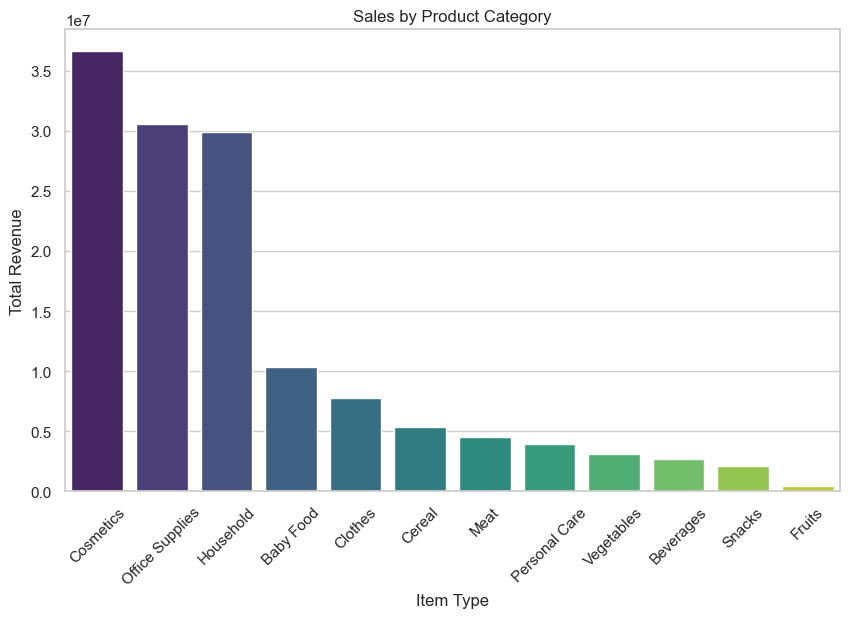

Sales by Region:
                               Region  Total Revenue
6                 Sub-Saharan Africa    39672031.43
3                             Europe    33368932.11
0                               Asia    21347091.02
1              Australia and Oceania    14094265.13
4       Middle East and North Africa    14052706.58
2  Central America and the Caribbean     9170385.49
5                      North America     5643356.55


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/2312887740.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Total Revenue', palette="plasma")


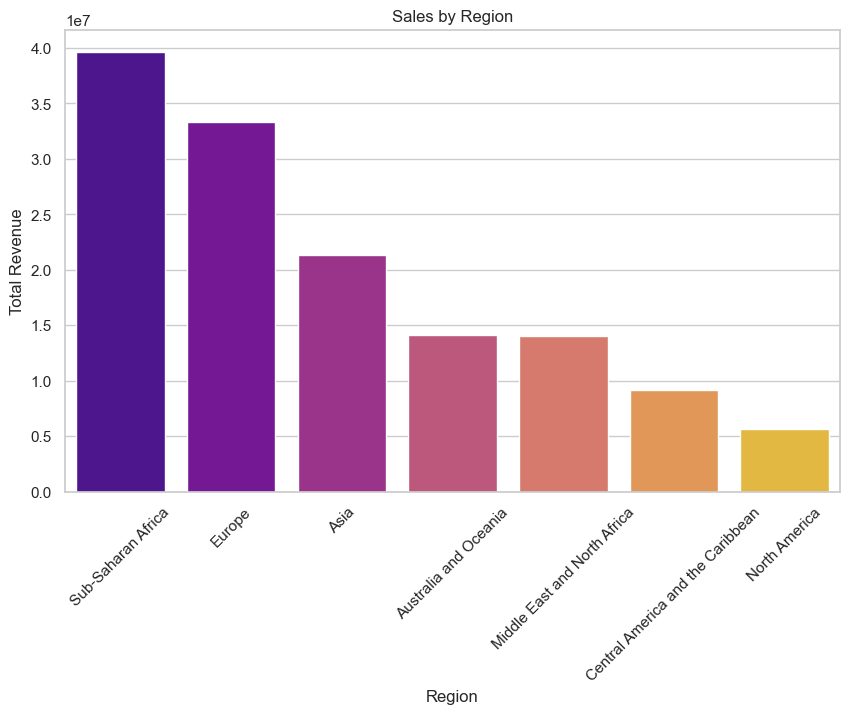

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/2312887740.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_sales, x='Sales Channel', y='Total Revenue', palette="coolwarm")


Sales by Sales Channel:
   Sales Channel  Total Revenue
0       Offline    79094809.20
1        Online    58253959.11


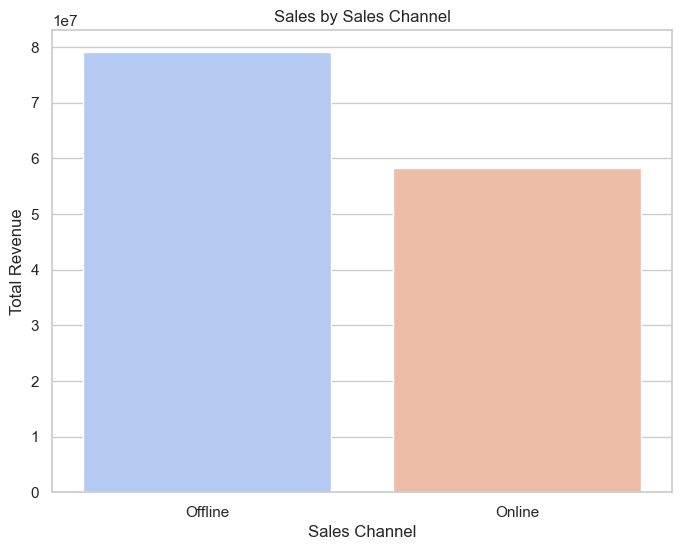

Sales by Order Priority:
   Order Priority  Total Revenue
1              H    48749546.05
2              L    36628127.46
3              M    33116031.75
0              C    18855063.05


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_59746/2312887740.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=priority_sales, x='Order Priority', y='Total Revenue', palette="magma")


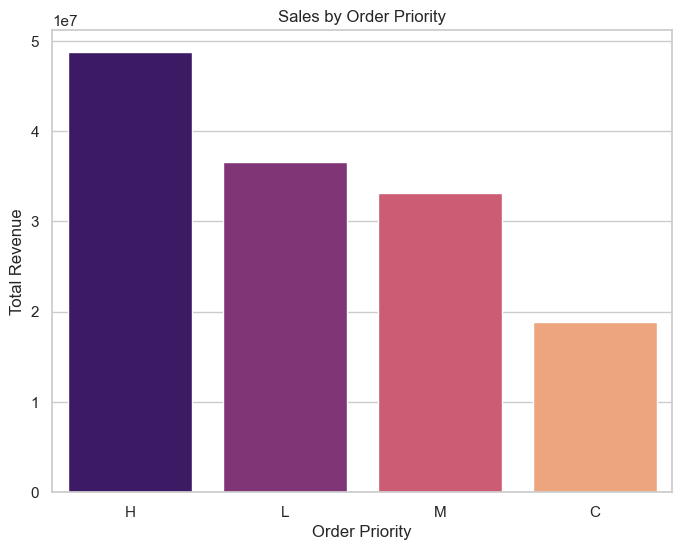

In [8]:
# Factor 1: Product Categories
category_sales = df.groupby('Item Type')['Total Revenue'].sum().reset_index()
category_sales = category_sales.sort_values(by='Total Revenue', ascending=False)
print("Sales by Product Category:\n", category_sales)

# Plot for Product Categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Item Type', y='Total Revenue', palette="viridis")
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

# Factor 2: Region
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
region_sales = region_sales.sort_values(by='Total Revenue', ascending=False)
print("Sales by Region:\n", region_sales)

# Plot for Regions
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Total Revenue', palette="plasma")
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.show()

# Factor 3: Sales Channel
channel_sales = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()
channel_sales = channel_sales.sort_values(by='Total Revenue', ascending=False)
print("Sales by Sales Channel:\n", channel_sales)

# Plot for Sales Channel
plt.figure(figsize=(8, 6))
sns.barplot(data=channel_sales, x='Sales Channel', y='Total Revenue', palette="coolwarm")
plt.title("Sales by Sales Channel")
plt.show()

# Factor 4: Order Priority
priority_sales = df.groupby('Order Priority')['Total Revenue'].sum().reset_index()
priority_sales = priority_sales.sort_values(by='Total Revenue', ascending=False)
print("Sales by Order Priority:\n", priority_sales)

# Plot for Order Priority
plt.figure(figsize=(8, 6))
sns.barplot(data=priority_sales, x='Order Priority', y='Total Revenue', palette="magma")
plt.title("Sales by Order Priority")
plt.show()


## relationships between different attributes

Correlation Matrix:
                Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
Units Sold       1.000000   -0.070486  -0.092232       0.447784    0.374746   
Unit Price      -0.070486    1.000000   0.987270       0.752360    0.787905   
Unit Cost       -0.092232    0.987270   1.000000       0.715623    0.774895   
Total Revenue    0.447784    0.752360   0.715623       1.000000    0.983928   
Total Cost       0.374746    0.787905   0.774895       0.983928    1.000000   
Total Profit     0.564550    0.557365   0.467214       0.897327    0.804091   

               Total Profit  
Units Sold         0.564550  
Unit Price         0.557365  
Unit Cost          0.467214  
Total Revenue      0.897327  
Total Cost         0.804091  
Total Profit       1.000000  


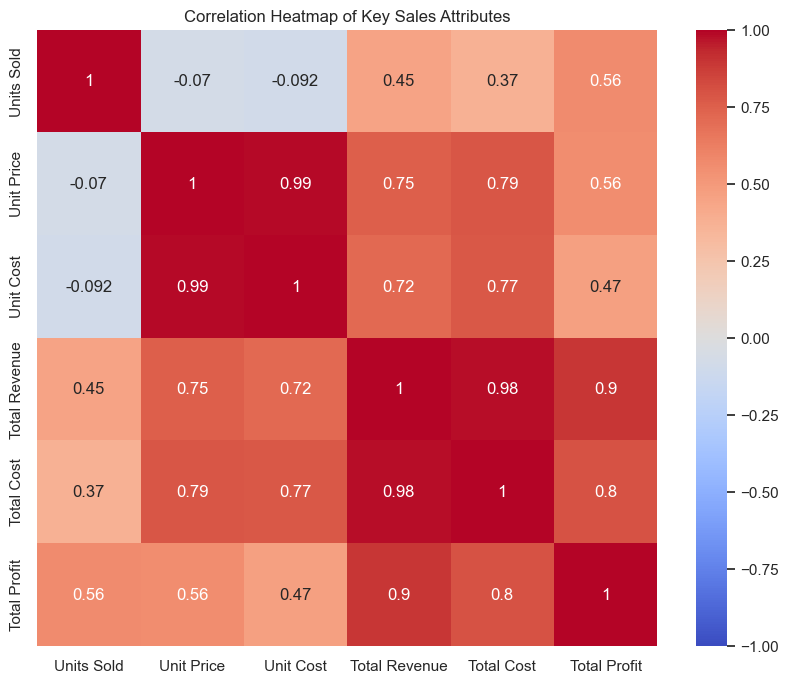

In [9]:
# Selecting relevant columns for correlation analysis
correlation_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
correlation_data = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Key Sales Attributes")
plt.show()

## Find Anomalies Or Outliers

Outliers Detected in Sales Data:
    Order Date  Total Revenue   Z-Score
94 2017-02-08     5997054.98  3.182718


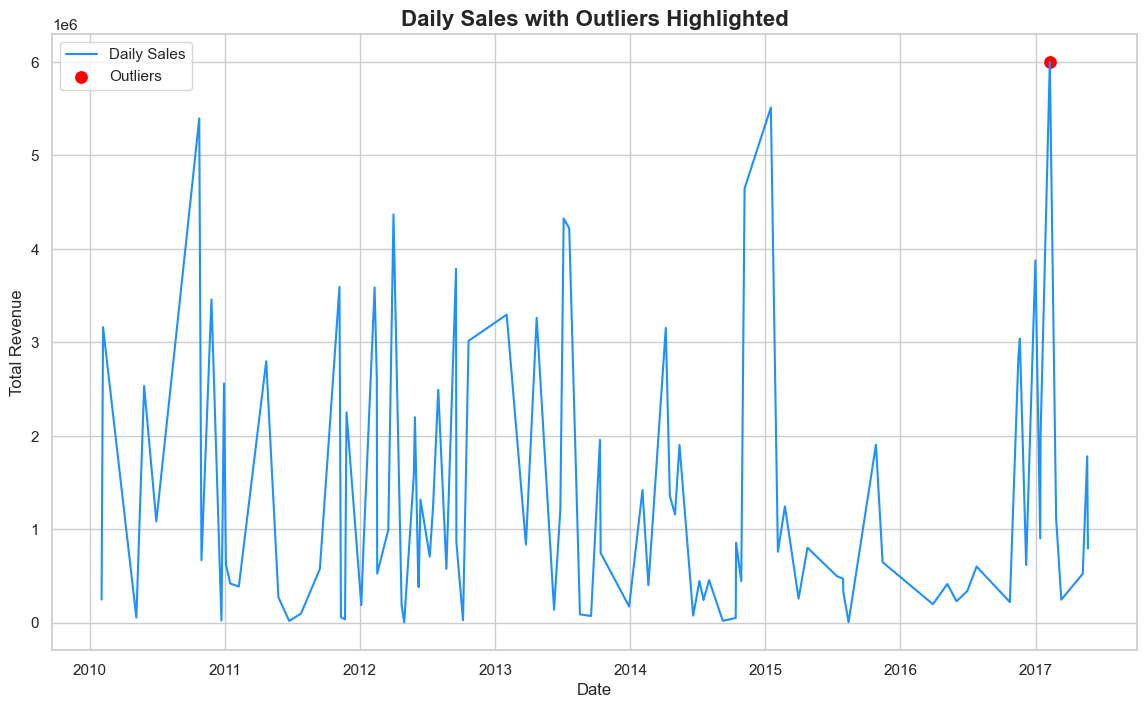

In [18]:
from scipy import stats 

# Aggregate daily or monthly sales
daily_sales = df.groupby(df['Order Date'].dt.to_period('D'))['Total Revenue'].sum().reset_index()
daily_sales['Order Date'] = daily_sales['Order Date'].dt.to_timestamp()

# Calculate Z-scores to detect outliers
daily_sales['Z-Score'] = stats.zscore(daily_sales['Total Revenue'])

# Set threshold for outliers (e.g., Z-score > 3 or < -3)
outliers = daily_sales[np.abs(daily_sales['Z-Score']) > 3]

# Print outliers for review
print("Outliers Detected in Sales Data:\n", outliers)

# Plot daily sales with outliers highlighted
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_sales, x='Order Date', y='Total Revenue', label='Daily Sales',color="dodgerblue")
sns.scatterplot(data=outliers, x='Order Date', y='Total Revenue', color='red', s=100, label='Outliers')
plt.title("Daily Sales with Outliers Highlighted", fontsize=16, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()